In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the Dataset

In [2]:
df = pd.read_csv("movement_data.csv", low_memory=False)
df

,x,y,z,labels,label
0,-0.1969,0.9021,-0.4356,syncJumping,10
1,-0.2046,0.9060,-0.4317,syncJumping,10
2,-0.2008,0.9021,-0.4317,syncJumping,10
3,-0.1969,0.8982,-0.4356,syncJumping,10
4,-0.1969,0.9060,-0.4278,syncJumping,10
...,...,...,...,...,...
3540045,-0.3743,0.9293,-0.1502,cycling,0
3540046,-0.3743,0.9409,-0.1541,cycling,0
3540047,-0.3743,0.9254,-0.1346,cycling,0
3540048,-0.3627,0.9176,-0.1267,cycling,0


In [3]:
df = df.drop(['label'], axis=1).copy()

In [4]:
df

,x,y,z,labels
0,-0.1969,0.9021,-0.4356,syncJumping
1,-0.2046,0.9060,-0.4317,syncJumping
2,-0.2008,0.9021,-0.4317,syncJumping
3,-0.1969,0.8982,-0.4356,syncJumping
4,-0.1969,0.9060,-0.4278,syncJumping
...,...,...,...,...
3540045,-0.3743,0.9293,-0.1502,cycling
3540046,-0.3743,0.9409,-0.1541,cycling
3540047,-0.3743,0.9254,-0.1346,cycling
3540048,-0.3627,0.9176,-0.1267,cycling


In [5]:
df['labels'].value_counts()

cycling            588524
walkingFast        311154
walkingNormal      306354
walkingSlow        305152
lyingDownLeft      234018
dishwashing        232303
sittingCouch       231444
lyingDownRight     224501
sittingSofa        222184
vacuumCleaning     221586
stakingShelves     217729
sittingChair       211727
standing           136139
step                48864
syncJumping         25899
walkingStairsUp     22472
Name: labels, dtype: int64

In [6]:
label = LabelEncoder()
df['label'] = label.fit_transform(df['labels'])
df.head()

,x,y,z,labels,label
0,-0.1969,0.9021,-0.4356,syncJumping,10
1,-0.2046,0.9060,-0.4317,syncJumping,10
2,-0.2008,0.9021,-0.4317,syncJumping,10
3,-0.1969,0.8982,-0.4356,syncJumping,10
4,-0.1969,0.9060,-0.4278,syncJumping,10


In [7]:
label.classes_

array(['cycling', 'dishwashing', 'lyingDownLeft', 'lyingDownRight',
       'sittingChair', 'sittingCouch', 'sittingSofa', 'stakingShelves',
       'standing', 'step', 'syncJumping', 'vacuumCleaning', 'walkingFast',
       'walkingNormal', 'walkingSlow', 'walkingStairsUp'], dtype=object)

In [8]:
df

,x,y,z,labels,label
0,-0.1969,0.9021,-0.4356,syncJumping,10
1,-0.2046,0.9060,-0.4317,syncJumping,10
2,-0.2008,0.9021,-0.4317,syncJumping,10
3,-0.1969,0.8982,-0.4356,syncJumping,10
4,-0.1969,0.9060,-0.4278,syncJumping,10
...,...,...,...,...,...
3540045,-0.3743,0.9293,-0.1502,cycling,0
3540046,-0.3743,0.9409,-0.1541,cycling,0
3540047,-0.3743,0.9254,-0.1346,cycling,0
3540048,-0.3627,0.9176,-0.1267,cycling,0


In [9]:
x = df[['x', 'y', 'z']]
y = df['label']

In [10]:
scaled_X = pd.DataFrame(data = x, columns=['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X

,x,y,z,label
0,-0.1969,0.9021,-0.4356,10
1,-0.2046,0.9060,-0.4317,10
2,-0.2008,0.9021,-0.4317,10
3,-0.1969,0.8982,-0.4356,10
4,-0.1969,0.9060,-0.4278,10
...,...,...,...,...
3540045,-0.3743,0.9293,-0.1502,0
3540046,-0.3743,0.9409,-0.1541,0
3540047,-0.3743,0.9254,-0.1346,0
3540048,-0.3627,0.9176,-0.1267,0


# Creating the Frame

In [11]:
import scipy.stats as stats

In [12]:
Fs = 20
frame_size = Fs*10
overlap = Fs*5

In [13]:
def Prepare_Frames(data, frame_size, overlap):
    frames = []
    labels = []
    
    for i in range (0, len(data) - frame_size, overlap):
        x = data['x'].values[i: i+frame_size]
        y = data['y'].values[i: i+frame_size]
        z = data['z'].values[i: i+frame_size]
        
        label = stats.mode(data['label'][i: i+frame_size])[0][0]
        
        frames.append([x, y, z])
        labels.append(label)
        
    frames = np.asarray(frames).reshape(-1, frame_size, 3)
    labels = np.asarray(labels)
    
    return frames, labels

In [14]:
X, Y = Prepare_Frames(scaled_X, frame_size, overlap)

In [15]:
X.shape, Y.shape

((35399, 200, 3), (35399,))

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [17]:
X_train.shape, X_test.shape

((28319, 200, 3), (7080, 200, 3))

# Feature Engineering the Data

In [23]:
from scipy.stats import kurtosis, iqr, skew, median_abs_deviation

In [24]:
def Feature_Extraction(X):
    mean_X = np.mean(X, axis=1)
    std_X = np.std(X, axis=1)
    var_X = np.var(X, axis=1)
    energy_X = np.sqrt(np.mean(np.power(X, 2), axis=1))
    mad_X = np.mean(np.abs(X - np.expand_dims(mean_X, axis=1)), axis=1)
    mad1_X = median_abs_deviation(X, axis=1, scale='normal')
    kurtosis_X = kurtosis(X, axis=1)
    skew_X = skew(X, axis=1)
    iqr_X = iqr(X, axis=1)
    max_X = np.amax(X, axis=1)
    min_X = np.amin(X, axis=1)
    
    return np.concatenate((mean_X,std_X,var_X,energy_X,mad_X,mad1_X,kurtosis_X,skew_X,iqr_X,max_X,min_X), axis=1)

In [25]:
X_train_eng = Feature_Extraction(X_train)
X_test_eng = Feature_Extraction(X_test)

In [26]:
X_train_eng.shape[1]

33

In [27]:
Y_train_eng = Y_train.copy()
Y_test_eng = Y_test.copy()

In [28]:
X_train

array([[[ 0.1038,  0.0382, -0.1352],
        [-0.2432, -0.2432, -0.0311],
        [-0.2817, -0.008 ,  0.096 ],
        ...,
        [ 0.2759,  0.4713,  0.3775],
        [ 0.3658,  0.358 ,  0.3071],
        [ 0.2172,  0.2368,  0.2524]],

       [[ 0.344 ,  0.3362,  0.344 ],
        [ 0.3401,  0.3479,  0.3401],
        [ 0.3557,  0.3323,  0.344 ],
        ...,
        [ 0.9503,  0.9424,  0.9582],
        [ 0.9345,  0.9741,  0.9503],
        [ 0.9622,  0.9622,  0.9345]],

       [[-0.9681, -0.9989, -0.8833],
        [-0.9411, -1.0144, -1.0876],
        [-1.0838, -0.8756, -0.6442],
        ...,
        [ 0.3697,  0.3149,  0.4752],
        [ 0.3423,  0.358 ,  0.4557],
        [ 0.487 ,  0.5104,  0.1977]],

       ...,

       [[-0.4283, -0.4283, -0.4591],
        [-0.463 , -0.4514, -0.4475],
        [-0.4321, -0.436 , -0.4283],
        ...,
        [-0.0603, -0.0876, -0.0837],
        [-0.0994, -0.0798, -0.1033],
        [-0.115 , -0.1228, -0.1424]],

       [[-0.7869, -0.7792, -0.7483],
  

# KNN 

In [63]:
from sklearn.neighbors import KNeighborsClassifier

KNN_Classifier = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance')

In [64]:
from time import time
from sklearn.metrics import f1_score, accuracy_score

time0 = time()
KNN_Classifier.fit(X_train_eng, Y_train_eng)
y_pred_KNN = KNN_Classifier.predict(X_test_eng)
KNN_acc = accuracy_score(Y_test_eng, y_pred_KNN)
KNN_mean_f1 = f1_score(Y_test_eng, y_pred_KNN, average='macro')
KNN_weighted_f1 = f1_score(Y_test_eng, y_pred_KNN, average='weighted')

print('acc: {:.2f}, mean f1: {:.2f}, weighted f1: {:.2f}, time: {:.2f} sec'.format(KNN_acc, KNN_mean_f1, KNN_weighted_f1,
                                                                                  time()-time0))

acc: 0.86, mean f1: 0.82, weighted f1: 0.85, time: 4.14 sec


In [33]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

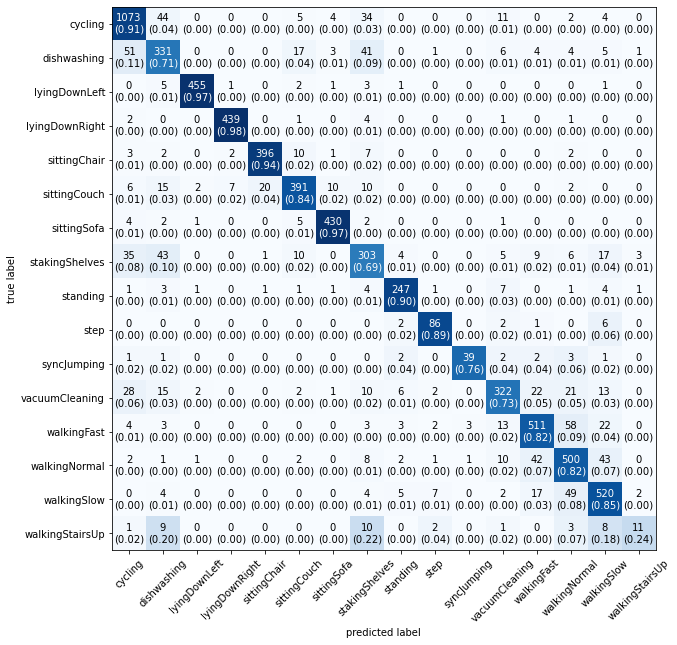

In [65]:
mat_KNN = confusion_matrix(Y_test_eng, y_pred_KNN)
plot_confusion_matrix(conf_mat=mat_KNN, class_names=label.classes_, show_normed=True, figsize=(10, 10))

In [61]:
from sklearn.model_selection import GridSearchCV

parameters = [{'n_neighbors': [5, 10, 15, 20, 25, 30],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}]

clf_KNN = GridSearchCV(KNeighborsClassifier(), parameters, cv=3, n_jobs=-1)
clf_KNN.fit(X_train_eng, Y_train_eng)

print('Best Parameters: ')
print(clf_KNN.best_params_)
print('---------------------------')

means = clf_KNN.cv_results_['mean_test_score']
stds = clf_KNN.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf_KNN.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best Parameters: 
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
---------------------------
0.832 (+/-0.007) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.836 (+/-0.007) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.825 (+/-0.004) for {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
0.832 (+/-0.003) for {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
0.817 (+/-0.004) for {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}
0.826 (+/-0.003) for {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
0.809 (+/-0.005) for {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'uniform'}
0.821 (+/-0.003) for {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'distance'}
0.802 (+/-0.006) for {'metric': 'euclidean', 'n_neighbors': 25, 'weights': 'uniform'}
0.815 (+/-0.005) for {'metric': 'euclidean', 'n_neighbors': 25, 'weights': 'distance'}
0.795 (+/-0.003) for {'met

# SVM RBF

In [44]:
from sklearn.svm import SVC

SVM_rbf = SVC(kernel="rbf", C=1000, gamma=0.5)

time1 = time()

SVM_rbf.fit(X_train_eng, Y_train_eng)
y_pred_SVM = SVM_rbf.predict(X_test_eng)
SVM_acc = accuracy_score(Y_test_eng, y_pred_SVM)
SVM_mean_f1 = f1_score(Y_test_eng, y_pred_SVM, average='macro')
SVM_weighted_f1 = f1_score(Y_test_eng, y_pred_SVM, average='weighted')

print('acc: {:.2f}, mean f1: {:.2f}, weighted f1: {:.2f}, time: {:.2f} sec'.format(SVM_acc, SVM_mean_f1, SVM_weighted_f1,
                                                                                  time()-time1))

acc: 0.87, mean f1: 0.83, weighted f1: 0.86, time: 17.13 sec


(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

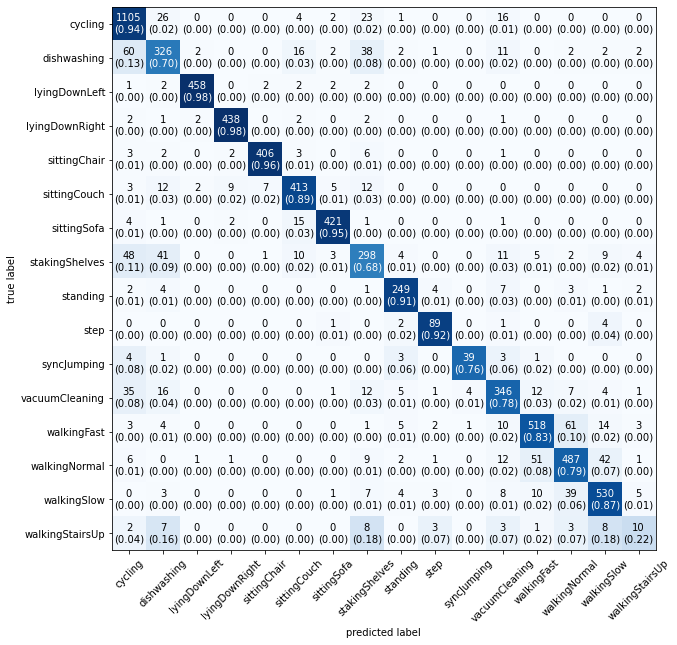

In [45]:
mat_SVM = confusion_matrix(Y_test_eng, y_pred_SVM)
plot_confusion_matrix(conf_mat=mat_SVM, class_names=label.classes_, show_normed=True, figsize=(10, 10))

In [48]:
svm_parameters = [{'kernel': ['rbf'],
                  'gamma': [0.5, 1, 3], #removed 1e-4, 0.01, 0.1
                  'C': [1, 10, 100, 1000]}]

clf_SVM = GridSearchCV(SVC(), svm_parameters, cv=5, scoring="f1_macro")
clf_SVM.fit(X_train_eng, Y_train_eng)

print('Best Parameters: ')
print(clf_SVM.best_params_)
print('---------------------------')

SVM_means = clf_SVM.cv_results_['mean_test_score']
SVM_stds = clf_SVM.cv_results_['std_test_score']

for mean, std, params in zip(SVM_means, SVM_stds, clf_SVM.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best Parameters: 
{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
---------------------------
0.729 (+/-0.010) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.753 (+/-0.012) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.763 (+/-0.021) for {'C': 1, 'gamma': 3, 'kernel': 'rbf'}
0.797 (+/-0.009) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.805 (+/-0.007) for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.806 (+/-0.021) for {'C': 10, 'gamma': 3, 'kernel': 'rbf'}
0.818 (+/-0.008) for {'C': 100, 'gamma': 0.5, 'kernel': 'rbf'}
0.821 (+/-0.010) for {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.806 (+/-0.019) for {'C': 100, 'gamma': 3, 'kernel': 'rbf'}
0.821 (+/-0.004) for {'C': 1000, 'gamma': 0.5, 'kernel': 'rbf'}
0.820 (+/-0.009) for {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
0.803 (+/-0.018) for {'C': 1000, 'gamma': 3, 'kernel': 'rbf'}


# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier(n_estimators=200, max_features='auto', max_depth=20)

time2 = time()

RF_clf.fit(X_train_eng, Y_train_eng)
y_pred_RF = RF_clf.predict(X_test_eng)
RF_acc = accuracy_score(Y_test_eng, y_pred_RF)
RF_mean_f1 = f1_score(Y_test_eng, y_pred_RF, average='macro')
RF_weighted_f1 = f1_score(Y_test_eng, y_pred_RF, average='weighted')

print('acc: {:.2f}, mean f1: {:.2f}, weighted f1: {:.2f}, time: {:.2f} sec'.format(RF_acc, RF_mean_f1, RF_weighted_f1,
                                                                                  time()-time2))

acc: 0.88, mean f1: 0.85, weighted f1: 0.88, time: 17.72 sec


(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

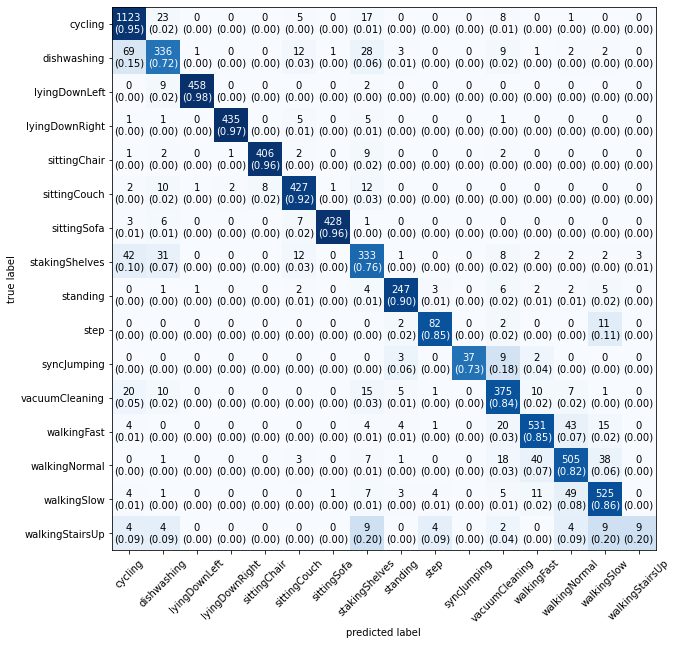

In [58]:
mat_RF = confusion_matrix(Y_test_eng, y_pred_RF)
plot_confusion_matrix(conf_mat=mat_RF, class_names=label.classes_, show_normed=True, figsize=(10, 10))

In [56]:
RF_parameters = [{'max_depth': [5, 10, 15, 20, 30, 50]}]

clf_RF = GridSearchCV(RandomForestClassifier(n_estimators=200), RF_parameters, cv=5, scoring="f1_macro")
clf_RF.fit(X_train_eng, Y_train_eng)

print('Best Parameters: ')
print(clf_RF.best_params_)
print('---------------------------')

RF_means = clf_RF.cv_results_['mean_test_score']
RF_stds = clf_RF.cv_results_['std_test_score']

for mean, std, params in zip(RF_means, RF_stds, clf_RF.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best Parameters: 
{'max_depth': 20}
---------------------------
0.585 (+/-0.027) for {'max_depth': 5}
0.803 (+/-0.010) for {'max_depth': 10}
0.842 (+/-0.014) for {'max_depth': 15}
0.848 (+/-0.011) for {'max_depth': 20}
0.848 (+/-0.011) for {'max_depth': 30}
0.848 (+/-0.012) for {'max_depth': 50}
